In [1]:
import numpy as np 
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import math
from sklearn.preprocessing import PolynomialFeatures
from scipy.optimize import curve_fit
import seaborn as sns
import scipy.stats as st

In [2]:
import warnings

#suppress warnings
warnings.filterwarnings('ignore')

In [3]:
df_weekly = pd.read_csv("data.csv")

In [4]:
df_weekly

,date,value
0,1973-01-03,613.6740
1,1973-01-10,596.5820
2,1973-01-17,597.5670
3,1973-01-24,589.7440
4,1973-01-31,596.4237
...,...,...
2651,2023-10-25,17328.5438
2652,2023-11-01,17359.6371
2653,2023-11-08,17308.6927
2654,2023-11-15,17345.2253


In [5]:
df_weekly['date'] = df_weekly['date'] = pd.to_datetime(df_weekly['date'])

In [6]:
df_weekly = df_weekly.groupby([pd.Grouper(key='date', freq='M')], as_index=False).mean()

In [7]:
df_weekly

,date,value
0,1973-01-31,598.798140
1,1973-02-28,598.920700
2,1973-03-31,602.040075
3,1973-04-30,611.274775
4,1973-05-31,614.854700
...,...,...
606,2023-07-31,17341.613475
607,2023-08-31,17325.385520
608,2023-09-30,17325.452975
609,2023-10-31,17334.109675


In [8]:
df = df_weekly.copy()

In [9]:
df

,date,value
0,1973-01-31,598.798140
1,1973-02-28,598.920700
2,1973-03-31,602.040075
3,1973-04-30,611.274775
4,1973-05-31,614.854700
...,...,...
606,2023-07-31,17341.613475
607,2023-08-31,17325.385520
608,2023-09-30,17325.452975
609,2023-10-31,17334.109675


In [10]:
# df['date'] = df['date'].dt.strftime('%Y-%m')

In [11]:
df

,date,value
0,1973-01-31,598.798140
1,1973-02-28,598.920700
2,1973-03-31,602.040075
3,1973-04-30,611.274775
4,1973-05-31,614.854700
...,...,...
606,2023-07-31,17341.613475
607,2023-08-31,17325.385520
608,2023-09-30,17325.452975
609,2023-10-31,17334.109675


Text(0, 0.5, 'value in billion')

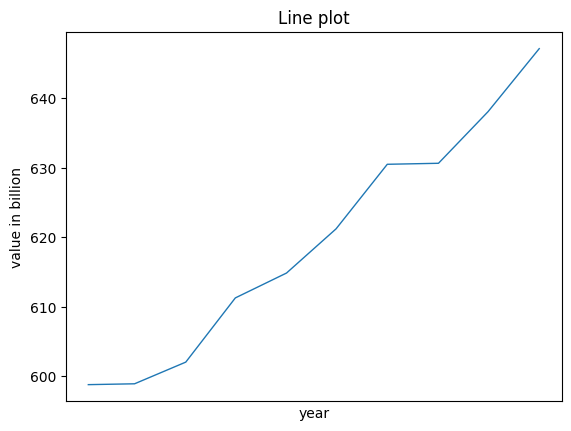

In [12]:
ax = plt.gca()

ax.xaxis.set_major_locator(matplotlib.dates.YearLocator())
ax.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%Y'))

plt.plot(df["date"][:10], df["value"][:10], linewidth=1) 

plt.title('Line plot')
plt.xlabel('year')
plt.ylabel('value in billion')

<Axes: xlabel='date'>

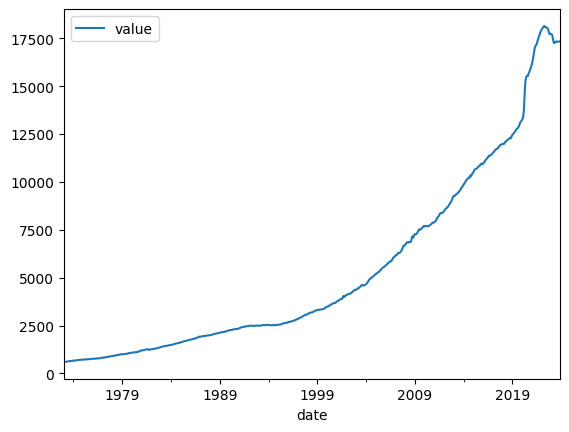

In [13]:
df.plot(x='date', y='value')

In [14]:
df['Темп роста'] = [None] + [df['value'][i+1]/df['value'][i] for i in range(len(df['date'])-1)]

In [15]:
df

,date,value,Темп роста
0,1973-01-31,598.798140,NaN
1,1973-02-28,598.920700,1.000205
2,1973-03-31,602.040075,1.005208
3,1973-04-30,611.274775,1.015339
4,1973-05-31,614.854700,1.005856
...,...,...,...
606,2023-07-31,17341.613475,1.001568
607,2023-08-31,17325.385520,0.999064
608,2023-09-30,17325.452975,1.000004
609,2023-10-31,17334.109675,1.000500


<Axes: xlabel='date'>

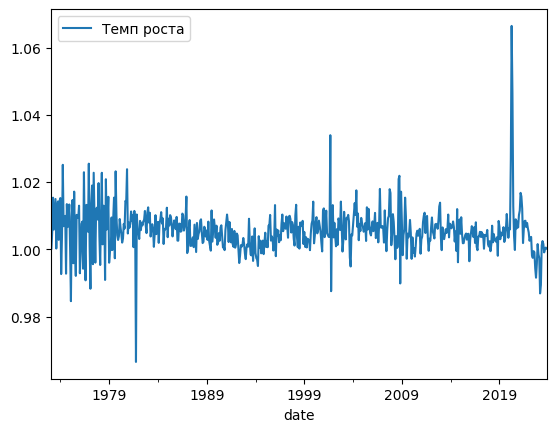

In [16]:
df.plot(x='date', y='Темп роста')

In [17]:
df['Темп прироста'] = df['Темп роста']-1

<Axes: xlabel='date'>

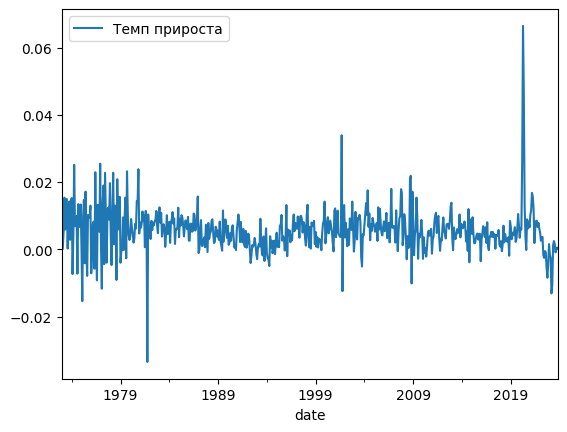

In [18]:
df.plot(x='date', y='Темп прироста')

In [19]:
df['Абсолютный прирост'] = [None] + [df['value'][i+1]-df['value'][i] for i in range(len(df['date'])-1)]

<Axes: xlabel='date'>

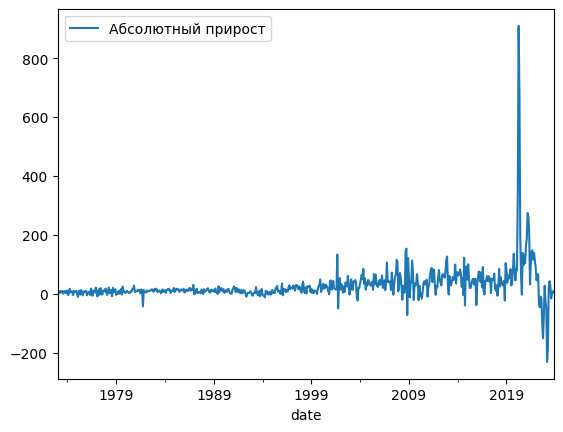

In [20]:
df.plot(x='date', y='Абсолютный прирост')

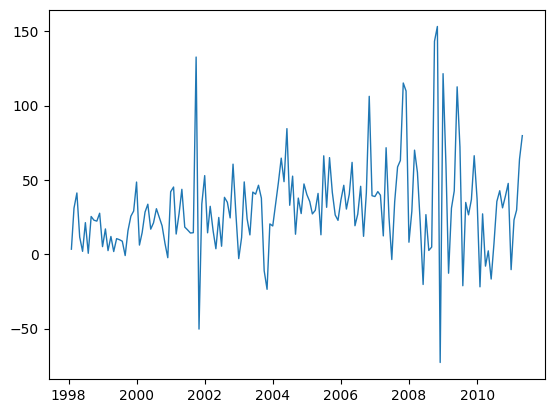

In [21]:
plt.plot(df["date"][300:460], df["Абсолютный прирост"][300:460], linewidth=1) 

In [22]:
columns = math.floor(1 + 3.3222 * math.log10(len(df['value']))) #колличество рядов
print(len(df['value']))
columns

611


10

In [23]:
row_min = df['value'].min() #минимум
row_max = df['value'].max() #максимум
row_r = row_max - row_min #размах

x_size = row_r / columns
indent = math.floor((math.ceil(x_size) - x_size) * columns)
x_size_ceil = math.ceil(x_size)
start = row_min - indent / 2

print("поправка", indent)
print("старт", start)
print("Ширина", x_size_ceil)

# cоздаём интервалы
interval_row = {start + i * x_size_ceil: [] for i in range(columns)}
interval_row

поправка 9
старт 594.2981400000001
Ширина 1756


{594.2981400000001: [],
 2350.29814: [],
 4106.29814: [],
 5862.29814: [],
 7618.29814: [],
 9374.29814: [],
 11130.29814: [],
 12886.29814: [],
 14642.29814: [],
 16398.29814: []}

In [24]:
for value in df['value']:
    interval_row[start + (value - start) // x_size_ceil * x_size_ceil].append(value)
interval_row = {(2 * k + x_size_ceil) / 2: len(v) for k, v in interval_row.items()}
interval_row

{1472.29814: 216,
 3228.29814: 133,
 4984.29814: 54,
 6740.29814: 39,
 8496.298139999999: 42,
 10252.29814: 35,
 12008.29814: 41,
 13764.29814: 8,
 15520.29814: 10,
 17276.29814: 33}

(array([216., 133.,  54.,  39.,  42.,  35.,  41.,   8.,  10.,  33.]),
 array([ 1472.29814,  3052.69814,  4633.09814,  6213.49814,  7793.89814,
         9374.29814, 10954.69814, 12535.09814, 14115.49814, 15695.89814,
        17276.29814]),
 <BarContainer object of 10 artists>)

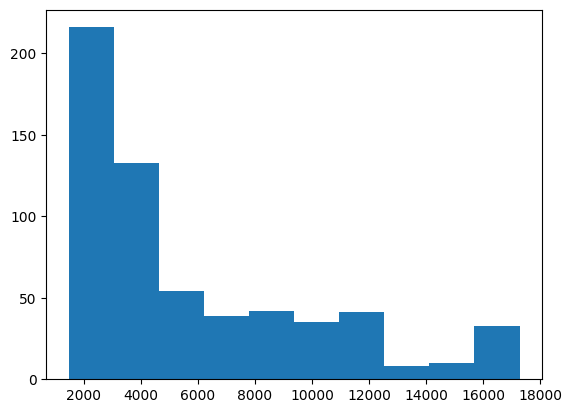

In [25]:
df_nd = [key for key, val in interval_row.items() for _ in range(val)]
plt.hist(df_nd)

In [26]:
df_smooth = df.copy()
df_smooth['smooth'] = [0] * len(df_smooth['value'])
for index,row in df_smooth.iterrows():
    month_index = row['date'].month #1 - январь, 12 - декабрь
    if(month_index not in [1,12]):
        val = df_smooth.loc[:,('value')][index-1 : index+2].mean()
        df_smooth.at[index,'smooth'] = val
df_smooth.head(20)

,date,value,Темп роста,Темп прироста,Абсолютный прирост,smooth
0,1973-01-31,598.798140,NaN,NaN,NaN,0.000000
1,1973-02-28,598.920700,1.000205,0.000205,0.122560,599.919638
2,1973-03-31,602.040075,1.005208,0.005208,3.119375,604.078517
3,1973-04-30,611.274775,1.015339,0.015339,9.234700,609.389850
4,1973-05-31,614.854700,1.005856,0.005856,3.579925,615.780933
5,1973-06-30,621.213325,1.010342,0.010342,6.358625,622.189600
6,1973-07-31,630.500775,1.014951,0.014951,9.287450,627.452993
7,1973-08-31,630.644880,1.000229,0.000229,0.144105,633.071652
8,1973-09-30,638.069300,1.011773,0.011773,7.424420,638.617207
9,1973-10-31,647.137440,1.014212,0.014212,9.068140,644.720913


In [27]:
df_len = df_smooth.shape[0]

for index,row in df_smooth.iterrows():
    month_index = row['date'].month #1 - январь, 12 - декабрь
    if(month_index == 1):
        k_index = min(index+10, df_len - index)
        l_index = index+1
        
        yl = df_smooth['smooth'][l_index]
        yk = df_smooth['smooth'][k_index]
        
        val = yl - (yk - yl)/(k_index - l_index)
        
        df_smooth.at[index,'smooth'] = val
        # Проверив то, что данные подставляются правильные мы заполняем все январи
    if(month_index == 12):
        k_index = index - 1
        l_index = index - 10
        
        yl = df_smooth['smooth'][l_index]
        yk = df_smooth['smooth'][k_index]
        
        val = yk + (yk - yl)/(k_index - l_index)
        
        df_smooth.at[index,'smooth'] = val
        
df_smooth[['date', 'smooth']].head(40)

,date,smooth
0,1973-01-31,594.193886
1,1973-02-28,599.919638
2,1973-03-31,604.078517
3,1973-04-30,609.389850
4,1973-05-31,615.780933
5,1973-06-30,622.189600
6,1973-07-31,627.452993
7,1973-08-31,633.071652
8,1973-09-30,638.617207
9,1973-10-31,644.720913


<Axes: xlabel='date'>

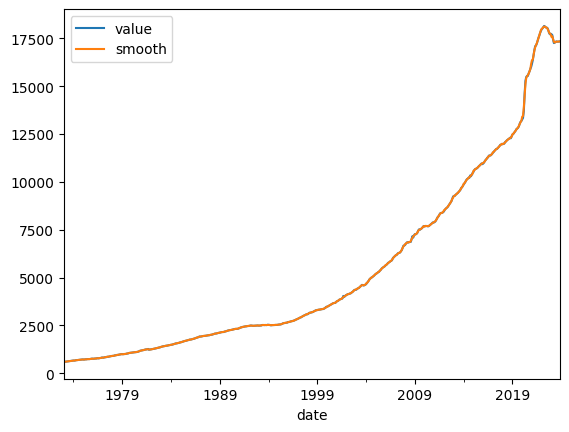

In [28]:
df_smooth[['date','value', 'smooth']].plot(x='date', y=['value', 'smooth'])

In [29]:
df_smooth['season'] = df_smooth['value']/df_smooth['smooth']
df_smooth

,date,value,Темп роста,Темп прироста,Абсолютный прирост,smooth,season
0,1973-01-31,598.798140,NaN,NaN,NaN,594.193886,1.007749
1,1973-02-28,598.920700,1.000205,0.000205,0.122560,599.919638,0.998335
2,1973-03-31,602.040075,1.005208,0.005208,3.119375,604.078517,0.996626
3,1973-04-30,611.274775,1.015339,0.015339,9.234700,609.389850,1.003093
4,1973-05-31,614.854700,1.005856,0.005856,3.579925,615.780933,0.998496
...,...,...,...,...,...,...,...
606,2023-07-31,17341.613475,1.001568,0.001568,27.153900,17327.152857,1.000835
607,2023-08-31,17325.385520,0.999064,-0.000936,-16.227955,17330.817323,0.999687
608,2023-09-30,17325.452975,1.000004,0.000004,0.067455,17328.316057,0.999835
609,2023-10-31,17334.109675,1.000500,0.000500,8.656700,17332.596100,1.000087


In [30]:
df_season = df_smooth.copy()
df_season['month_index'] = [-1] * df_season.shape[0]
for index,row in df_season.iterrows():
    df_season.at[index,'month_index'] = row['date'].month
df_season = df_season[['month_index', 'season']].groupby(['month_index'], as_index=False).mean()
df_season

,month_index,season
0,1,1.000295
1,2,0.998936
2,3,0.999460
3,4,1.000865
4,5,0.999628
5,6,1.000163
6,7,1.000839
7,8,0.998643
8,9,1.000593
9,10,0.999925


In [31]:
df_season['season'].sum()

11.999721302720594

In [32]:
df_smooth['corrected_value'] = df_smooth['value']
for index,row in df_smooth.iterrows():
    df_smooth.at[index,'corrected_value'] = row['value'] / df_season['season'][row['date'].month - 1]
df_smooth

,date,value,Темп роста,Темп прироста,Абсолютный прирост,smooth,season,corrected_value
0,1973-01-31,598.798140,NaN,NaN,NaN,594.193886,1.007749,598.621659
1,1973-02-28,598.920700,1.000205,0.000205,0.122560,599.919638,0.998335,599.558494
2,1973-03-31,602.040075,1.005208,0.005208,3.119375,604.078517,0.996626,602.365112
3,1973-04-30,611.274775,1.015339,0.015339,9.234700,609.389850,1.003093,610.746454
4,1973-05-31,614.854700,1.005856,0.005856,3.579925,615.780933,0.998496,615.083468
...,...,...,...,...,...,...,...,...
606,2023-07-31,17341.613475,1.001568,0.001568,27.153900,17327.152857,1.000835,17327.084577
607,2023-08-31,17325.385520,0.999064,-0.000936,-16.227955,17330.817323,0.999687,17348.924547
608,2023-09-30,17325.452975,1.000004,0.000004,0.067455,17328.316057,0.999835,17315.192276
609,2023-10-31,17334.109675,1.000500,0.000500,8.656700,17332.596100,1.000087,17335.401994


params:  624.3909518000404 1.0055823934189916
Covariance: 772280.0207777363
Corellation(Pirson): 0.9136003013958688


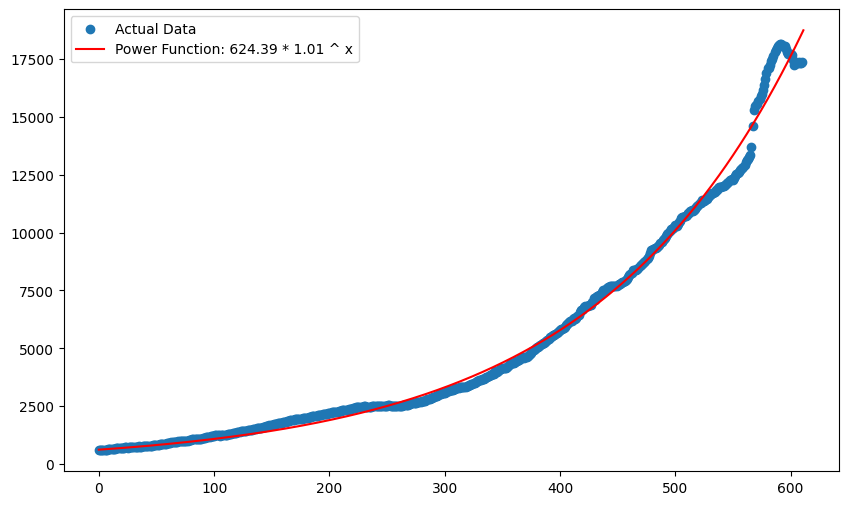

In [33]:
groups = df_smooth["corrected_value"]

Y = list(np.array(list(groups)).flatten())
l = len(Y)
X = np.array(range(l)).reshape(-1, 1)

# Power function to fit
def power_function(x, a, b):
    return a * np.power(b, x)

# Fit the power function to the data
params, covariance = curve_fit(power_function, X.flatten(), Y)
#a and b
print("params: ", *params)
covariance, stdx, stdy = 0, 0, 0
for i in range(len(Y)):
    covariance += (X.flatten()[i] - np.mean(X.flatten())) * (Y[i] - np.mean(Y))
    stdx += (X.flatten()[i] - np.mean(X.flatten()))**2
    stdy += (Y[i] - np.mean(Y))**2
stdx, stdy = stdx**0.5, stdy**0.5

print("Covariance:", covariance / len(Y))
corellation = covariance / (stdx * stdy)
print("Corellation(Pirson):", corellation)

# Generate values for the plot
X_plot = np.linspace(0, l, l)
Y_plot_power = power_function(X_plot, *params)

# Plot the results
fig, ax = plt.subplots(figsize=(10, 6))
plt.scatter(X, Y, label='Actual Data')
plt.plot(X_plot, Y_plot_power, color='red', label=f'Power Function: {params[0]:.2f} * {params[1]:.2f} ^ x')
plt.legend()
# plt.savefig("./assets/models_comparasion.png")
plt.show()

In [34]:
res = power_function([i for i in range(598, 610)], *params)
predict = res * df_smooth.tail(12)['season']
predict

599    17450.145972
600    17660.085811
601    17684.094647
602    17704.242752
603    17749.086179
604    17910.993554
605    18023.920614
606    18134.419222
607    18214.735926
608    18319.132966
609    18426.050684
610    18529.493633
Name: season, dtype: float64

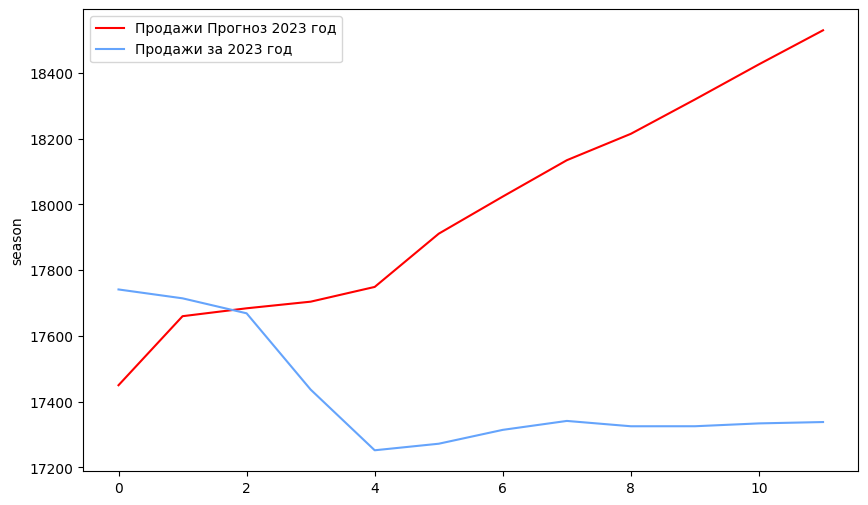

In [35]:
fig, ax = plt.subplots(figsize=(10, 6))
y_sales_2023 = df_smooth['value'][-12:]
y_predict_2023 = predict
sns.lineplot(x=range(len(y_predict_2023)), y=y_predict_2023, color='red', label='Продажи Прогноз 2023 год', ax=ax)
sns.lineplot(x=range(len(y_sales_2023)), y=y_sales_2023, color='#65a4fc', label='Продажи за 2023 год', ax=ax)
plt.show()

In [36]:
y_sales_2023 = df_smooth["value"][-12:]
y_sales_2023_mean = np.mean(y_sales_2023)
delta = np.array(y_sales_2023) - y_sales_2023_mean
E = np.array(y_sales_2023) / predict
R_sqared = 1 - np.dot(E, E.T) / np.dot(delta, delta.T)
print(f"R: {R_sqared}")
print(f"r xy: {np.sqrt(R_sqared)}")

R: 0.9999678893235743
r xy: 0.9999839445328981


In [37]:
# тут сделаем критерий Фишера
n = 12
m = 1
y_predict_2023_diff_y_mean = y_predict_2023 - y_sales_2023_mean
s_squared_factor = np.sum(np.power(y_predict_2023_diff_y_mean, 2)) / m # SSR / m
s_sqared_error = np.sum(np.power(y_sales_2023 - y_predict_2023, 2)) / (n - m - 1) # SSE / (n - m - 1)
F = s_squared_factor / s_sqared_error

print(f"F: {F}")

alpha = 0.05
#degree of freedom
df_num = m
df_denum = n - m - 1
f_critical = st.f.ppf(1 - alpha, df_num, df_denum)
print(f"F critical {f_critical}")

P = 1 - st.f.cdf(F, df_num, df_denum)
print(f"P: {P}")

F: 8.030680705756367
F critical 4.9646027437307145
P: 0.017734567524419265


In [39]:
T = st.t.ppf(1 - alpha/2, 10)
tb = np.sqrt(F)
print(T)
print(tb)

b = params[1]
mb = b / tb
print("mb", mb)
delta = T * mb
print("delta", delta)
print(f"interval: [{round(b - delta, 2)}; {round(b + delta, 2)}]")

2.2281388519649385
2.8338455684381194
mb 0.35484728053590464
delta 0.790649012276151
interval: [0.21; 1.8]
